# 주제

> 가장 인기 있는 메뉴는 무엇일까?

# 분석 과정

## 탐색 : 데이터의 기초 정보 살펴보기

### 데이터셋의 기초 정보 출력하기

In [15]:
import pandas as pd

# tsv 데이터를 csv 로 변환하여 데이터 프레임 형태로 가져오기
chipo = pd.read_csv('chipotle.tsv', sep = '\t')

print(chipo.shape)
print('---------------------------------------------')
print(chipo.info())

(4622, 5)
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


### 데이터셋의 행과 열, 데이터 확인하기

In [16]:
# 데이터 프레임에서 순서대로 10개의 데이터 확인
chipo.head(10)

print(chipo.columns)
print('---------------------------------------------')
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
---------------------------------------------
RangeIndex(start=0, stop=4622, step=1)


- order_id : 주문 번호
- quantity : 아이템의 주문 수량
- item_name : 주문한 아이템의 이름
- choice_description : 주문한 아이템의 상세 선택 옵션
- item_price : 주문 아이템의 가격 정보

### describe() 함수로 기초 통계량 출력하기

In [17]:
# order_id 컬럼의 데이터 타입을 int -> str 로 변경
chipo['order_id'] = chipo['order_id'].astype(str)

print(chipo.describe()) # 데이터 프레임에서 수치형 피쳐의 기초 통계량 확인

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


- 평균 주문 수량 : 1.07 개

> 한 사람이 같은 메뉴를 여러개 주문하는 경우는 많지 않음

### unique() 함수로 범주형 피쳐의 개수 출력하기

In [18]:
print(len(chipo['order_id'].unique())) # 고유 order_id의 개수 출력
print(len(chipo['item_name'].unique())) # 고유 item_name의 개수 출력

1834
50


## 인사이트의 발견 : 탐색과 시각화하기

### 가장 많이 주문한 아이템 Top 10 출력하기

In [21]:
item_count = chipo['item_name'].value_counts()

item_count

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [22]:
item_count_top10 = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count_top10.iteritems(),1):
    print("Top", idx, ':', val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


### 아이템별 주문 수량과 총량 구하기

In [25]:
# 아이템별 주문 수량
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [26]:
# 아이템별 주문 총량
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

### 시각화로 분석 결과 살펴보기

In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list)) # 아이템의 이름을 표현하기엔 공간이 협소해, 0~50 까지의 숫자를 x 축의 이름으로 사용
order_cnt = item_quantity.values.tolist()

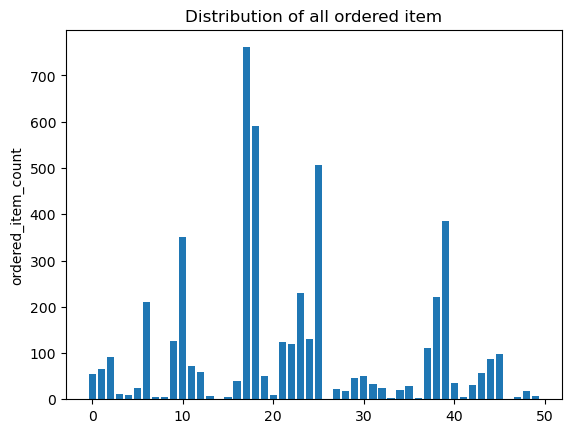

In [57]:
plt.bar(x_pos, order_cnt, align = 'center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

**value_counts() 와 unique() 의 차이점**

- value_counts()
> 시리즈(Series) 객체에서 사용할 수 있는 메서드로, 해당 시리즈 내의 고유한 값들의 빈도수를 반환.
> 이 메서드는 주로 범주형 데이터나 이산형 데이터에서 각 값의 빈도수를 확인 할 때 사용.
> 시리즈의 각 고유한 값에 대해 빈도수를 계산하여 내림차순으로 정렬된 시리즈 객체를 반환

- unique()
> 배열 또는 시리즈에서 중복을 제거한 고유한 값을 반환하는 메서드.
> 중복된 값을 제거하고 고유한 값들만을 반환하며, 원래 배열 또는 시리즈의 순서를 유지하고, 중복된 값이 제거된 순서대로 반환.
> 주로 배열 또는 시리즈 내의 고유한 값을 확인 할 때 사용

**- value_counts()** : 고유한 값의 빈도수를 반환
<br>
**- unique()** : 중복을 제거한 고유한 값들을 반환

## 데이터 전처리 : 전처리 함수 사용하기

### item_price 피쳐 살펴보기

In [36]:
print(chipo.info())
print('---------------------------------------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
---------------------------------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

### apply() 와 lambda 를 이용해 전처리

In [37]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


- apply() : 데이터프레임이나 시리즈의 각 요소에 함수를 적용할 때 사용
- lambda : 간단한 함수를 한 줄로 작성하여 사용

## 탐색적 분석

### 주문당 평균 계산금액 확인

In [38]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

> 1인당 평균 18달러 정도를 주문함

### 주문 건 당 10달러 이상 지불한 order_id 찾기

In [48]:
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]
print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


### 각 아이템의 가격 구하기

In [49]:
# 동일 아이템을 1개만 구매한 주문 선별
chipo_one_item = chipo[chipo.quantity == 1]

# item_name 으로 그룹을 나누고 그룹별 최저가 계산
price_per_item = chipo_one_item.groupby('item_name').min()

# item_price 기준으로 정렬
price_per_item.sort_values(by = 'item_price', ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


### 아이템 가격 분포 그래프 출력

In [50]:
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list)) # 아이템의 이름을 표현하기엔 공간이 협소해, 0~50 까지의 숫자를 x 축의 이름으로 사용
item_price = price_per_item['item_price'].tolist()

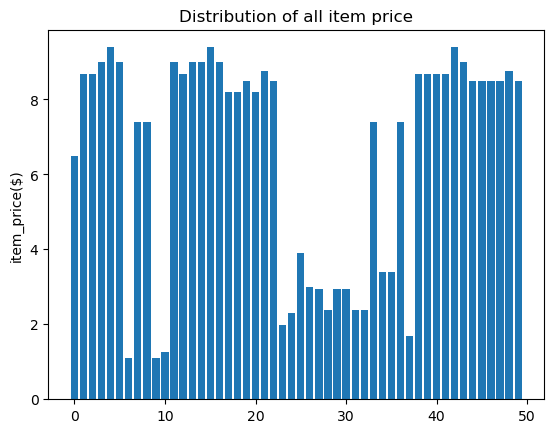

In [52]:
plt.bar(x_pos, item_price, align = 'center')
plt.ylabel('item_price($)')
plt.title('Distribution of all item price')

plt.show()

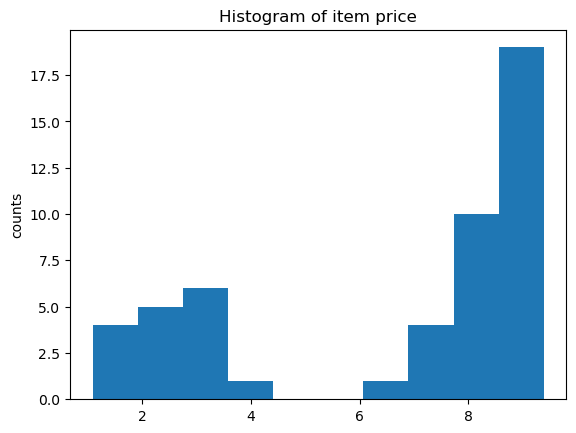

In [59]:
# 아이템 가격 히스토그램 출력
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

> 2달러에서 4달러, 6달러에서 8달러 정도에 아이템의 가격대가 형성되어 있음

### 가장 비싼 주문에서 아이템이 총 몇개 판매되었는지 구하기

In [60]:
chipo.groupby('order_id').sum().sort_values(by = 'item_price', ascending = False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


### 'Veggie Salad Bowl' 이 몇 번 주문되었는지 구하기

In [65]:
chipo_salad = chipo[chipo['item_name'] == 'Veggie Salad Bowl']

# # 한 주문 내에서 중복 집계된 item_name 제거
chipo_salad = chipo_salad.drop_duplicates(['item_name','order_id'])

print(len(chipo_salad))
chipo_salad.head()

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### 'Chicken Bowl' 을 2개 이상 주문한 횟수 구하기

In [67]:
chipo_chicken = chipo[chipo['item_name'] == 'Chicken Bowl']
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head()

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64

# 결론

- 가장 많이 주문한 아이템 : Chicken Bowl
- 주문된 전체 아이템 종류 : 50종
- 총 주문 건 수 : 1834건
- 주문 당 평균 계산 금액 : 약 18달러
- 아이템 별 가격 : 2에서 4달러 구간과, 6에서 8달러 구간으로 나누어져 있음